In [59]:
import pandas as pd
print(pd.__version__)
pd.set_option("display.max_rows", 12)

1.1.3


In [50]:
stroke = pd.read_csv('stroke.csv')

In [51]:
# View the first 5 rows of the dataset
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
# See what the different types of variables are
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [41]:
# Get some basic statistical information.
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [42]:
# We are missing some data in the BMI column
stroke.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [43]:
# 201 out of 5110 patients have not reported their BMI. Maybe average them based on their age group 
# could be a good idea? Can also drop them completely, since it is roughly 2% of the participants.
stroke['bmi'].isnull().sum()

201

In [44]:
# There are significantly more females in the study than males. Since there is only one "other",
# one can not draw much valid information based on this. 
stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:ylabel='Frequency'>

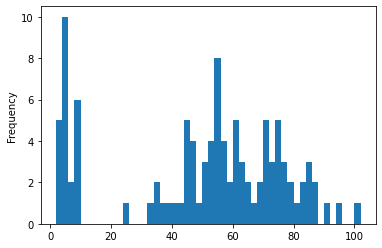

In [45]:
# Check the age distribution. Interesting gap between infants and adults.
stroke['age'].value_counts().plot(kind='hist', bins=50)

In [54]:
# Check how many people have been/are married
stroke['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [57]:
# If you have been married than you have a higher change of having had a stroke :) 
# PS: This is mostly due to the age of married people being higher than the age of unmarried people, 
# so I doubt this is as interesting as it sounds.
stroke.groupby('ever_married').mean()['stroke']

ever_married
No     0.016505
Yes    0.065613
Name: stroke, dtype: float64